In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Clustering Colors from an Image

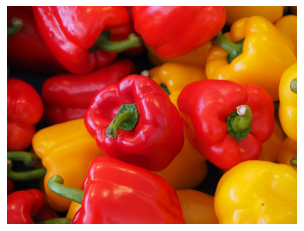

In [2]:
# load image
img = plt.imread('peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');


The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [3]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

(307200, 3)


(307200, 3)

In [4]:
# Question1 Apply k-means Algorithm
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters =15).fit(img_flat)
kmeans.labels_

array([ 8,  8,  8, ..., 12, 12, 12])

In [5]:
#Question 2
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]
img_flat2 = img_flat.copy()
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_ == i,:] = kmeans.cluster_centers_[i]

(-0.5, 639.5, 479.5, -0.5)

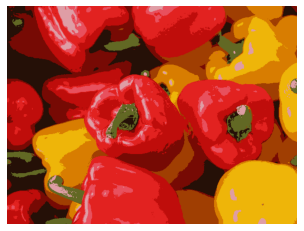

In [8]:
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off')

#Question 3 Apply elbow method

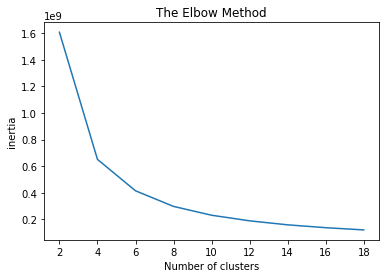

In [8]:
all_inertia = []
for i in range(2,20,2):
    Kmeans = KMeans(n_clusters = i, random_state = 42)
    Kmeans.fit(img_flat)
    all_inertia.append(Kmeans.inertia_)

    
plt.plot(range(2,20,2), all_inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

In [9]:
# the best number of clusters is 10